# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# seu
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/card_transdata.csv')

In [ ]:
# seu código
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# seu código
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Obs: Na célula abaixo há um código para renomear as colunas.

In [ ]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

In [ ]:
df.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

In [ ]:
# Vamos usar todas as variáveis

In [ ]:
# seu código

df_variaveis = df.copy()

## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

In [ ]:
import seaborn as sns

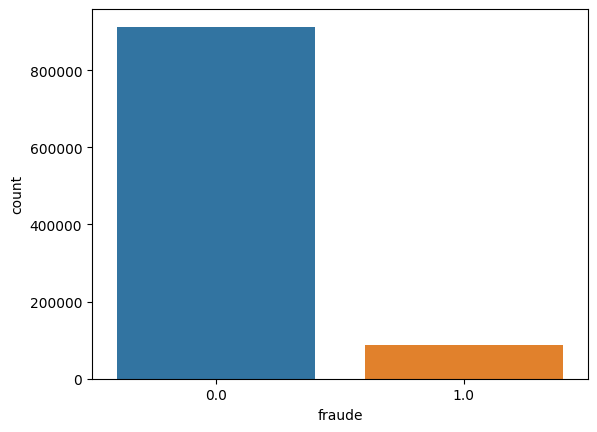

In [ ]:
# seu código
sns.countplot(x=df_variaveis['fraude']);

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [ ]:
# separando as variáveis X e y
X = df_variaveis[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y = df_variaveis['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [ ]:
# seu código
X


,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online
0,9.627867,3.096179,0.777555,1.0,0.0,0.0,1.0
1,4.595547,0.081393,0.251940,1.0,1.0,0.0,0.0
2,0.224957,4.170373,0.453547,0.0,1.0,1.0,1.0
3,4.047029,1.771421,2.891273,1.0,1.0,0.0,0.0
4,25.820471,32.093216,1.960582,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
174801,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
174802,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
174803,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0
174804,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
174801    1.0
174802    1.0
174803    1.0
174804    1.0
174805    1.0
Name: fraude, Length: 174806, dtype: float64

## Atividade 4: Crie um modelo de regressão logística.

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [ ]:
# criando modelo de regressão logística
modelo = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.211054
         Iterations 10


In [ ]:
modelo.params

const                    -7.631133
dist_casa                 0.029173
dist_ultima_transacao     0.049718
razao_preco_medio         1.213790
loja_repetida            -1.452355
usou_chip                -1.201361
usou_pin                -10.056211
online                    5.004523
dtype: float64

In [ ]:
modelo.predict(X)

0         0.062952
1         0.000053
2         0.000002
3         0.001401
4         0.656932
            ...   
174801    0.999677
174802    0.765927
174803    0.521297
174804    1.000000
174805    0.999822
Length: 174806, dtype: float64

In [ ]:
y_pred = (modelo.predict(X) >= 0.5).astype(int)

## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [ ]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174798
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.6955
Time:                        23:17:52   Log-Likelihood:                -36893.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.6311      0.054   -142.342      0.000      -7.736      -7.526
dist_casa                 0.0292      0.000    130.205      0.000       0.029       0.030
dist_ult

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[81425,  5978],
       [ 4455, 82948]])

In [ ]:
import matplotlib.pyplot as plt

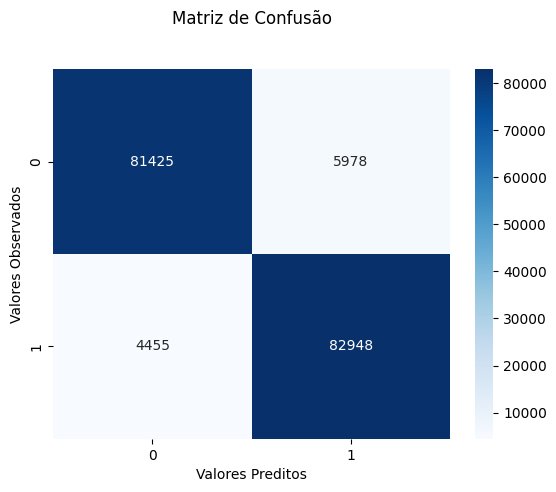

In [ ]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [ ]:
import numpy as np

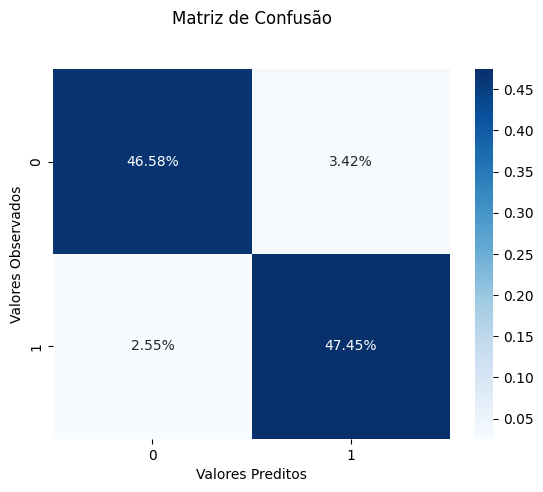

In [ ]:
sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



## Atividade 8: Crie a curva ROC para este modelo.

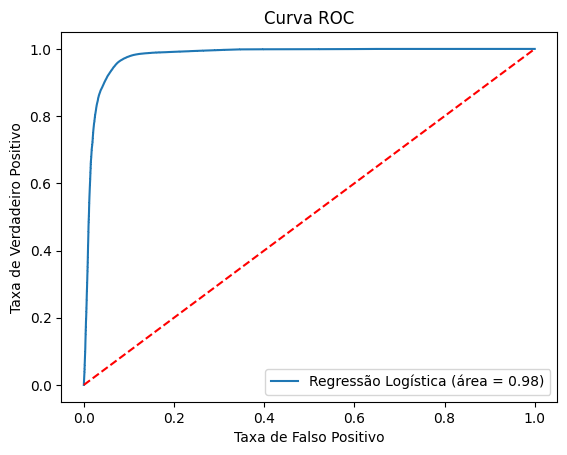

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [ ]:
dicionario_teste = {'dist_casa' : [82],
'dist_ultima_transacao' : [13],
'razao_preco_medio' : [14],
'loja_repetida' : [1],
'usou_chip' : [0],
'usou_pin' : [0],
'online' : [1]}
df_teste = pd.DataFrame(data=dicionario_teste)

Quando for fazer regressão no python sempre mandar o 1 no intercepto (primeiro valor)

In [ ]:
df_teste = np.array([1, 82, 13, 14, 1, 0, 0, 1])


In [ ]:
modelo.predict(df_teste)

array([0.99999988])

## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [ ]:
# seu
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIRIUS - Estatística Multivariada/SIRIUS - Semana 3 - Regressão Logistica/card_transdata.csv')

In [ ]:
# renomeando as colunas
df2.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

In [ ]:
import statsmodels.api as sm
X1 = df2[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y1 = df2['fraude']
X1 = sm.add_constant(X1)

In [ ]:
# criando modelo de regressão logística
modelo = sm.Logit(y1, X1).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12


In [ ]:
modelo.params

const                   -10.361061
dist_casa                 0.015217
dist_ultima_transacao     0.025258
razao_preco_medio         0.862251
loja_repetida            -0.621471
usou_chip                -1.049060
usou_pin                -13.740402
online                    6.651379
dtype: float64

In [ ]:
modelo.predict(X)

0         6.576122e-09
1         1.255934e-04
2         5.624621e-05
3         3.593607e-05
4         1.655186e-01
              ...     
174801    9.823162e-01
174802    1.802488e-01
174803    1.131061e-01
174804    1.000000e+00
174805    9.878631e-01
Length: 174806, dtype: float64

In [ ]:
y_pred = (modelo.predict(X1) >= 0.5).astype(int)

In [ ]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.5423
Time:                        23:08:20   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.3611      0.044   -237.200      0.000     -10.447     -10.275
dist_casa                 0.0152   8.32e-05    182.831      0.000       0.015       0.015
dist_ult

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y1, y_pred)
matriz_confusao

array([[906272,   6325],
       [ 34837,  52566]])

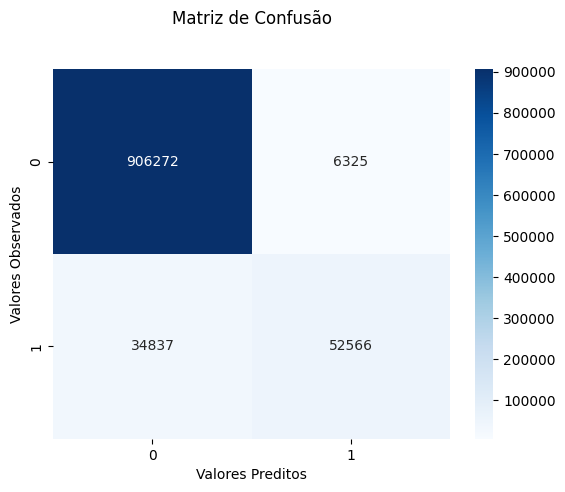

In [ ]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

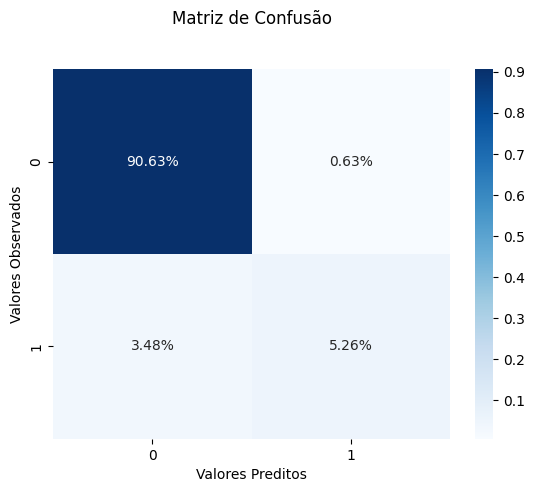

In [ ]:
sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



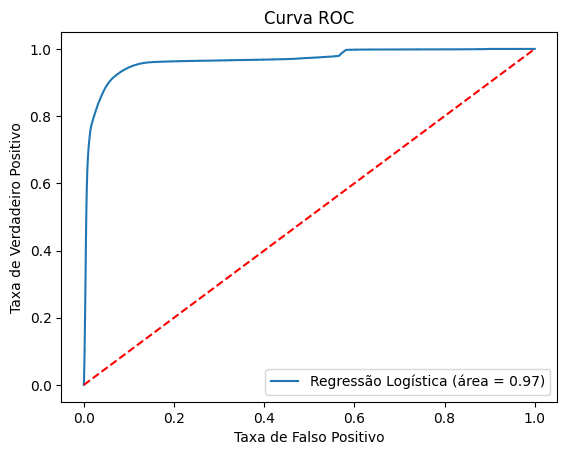

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y1, modelo.predict(X1))
fpr, tpr, thresholds = roc_curve(y1, modelo.predict(X1))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");